In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading data
df = pd.read_csv('country_vaccination_stats.csv')
df.head()

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,NaN,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             1502 non-null   object 
 1   date                1502 non-null   object 
 2   daily_vaccinations  1442 non-null   float64
 3   vaccines            1502 non-null   object 
dtypes: float64(1), object(3)
memory usage: 47.1+ KB


country                0
date                   0
daily_vaccinations    60
vaccines               0
dtype: int64

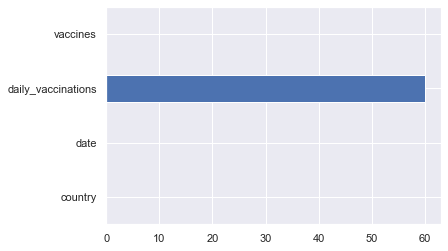

In [4]:
#how many missing values? 
df.isnull().sum().plot(kind='barh');
df.isnull().sum()

In [5]:
# minimum values for each country
df.groupby('country').min()

,date,daily_vaccinations,vaccines
country,,,
Argentina,1/1/2021,6483.0,Sputnik V
Austria,1/10/2021,3368.0,Pfizer/BioNTech
Bahrain,1/1/2021,943.0,"Pfizer/BioNTech, Sinopharm"
Belgium,1/1/2021,1.0,Pfizer/BioNTech
Brazil,1/16/2021,112.0,Sinovac
Bulgaria,1/1/2021,472.0,"Moderna, Pfizer/BioNTech"
Canada,1/1/2021,866.0,"Moderna, Pfizer/BioNTech"
Chile,1/1/2021,51.0,Pfizer/BioNTech
China,1/1/2021,187500.0,"CNBG, Sinovac"


In [6]:
#unique values of column to countries
a = df.country.unique()

In [7]:
fill_na = ['Argentina', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Ecuador', 'England', 'Estonia', 'Finland',
       'France', 'Germany', 'Gibraltar', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Isle of Man', 'Israel', 'Italy',
       'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico',
       'Netherlands', 'Northern Ireland', 'Norway', 'Oman', 'Panama',
       'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia',
       'Scotland', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Wales']

In [13]:
#minimum number of daily vaccinations for a single country
df[df.country =='Turkey'].min()[2]

67192.0

In [9]:
#filling in all missing values with the minimum number of vaccines(without 'Kuwait')
for i in fill_na:
    df[df.country ==i] = df[df.country ==i].fillna(df[df.country ==i].min()[2])

In [10]:
#I filled Kuwait with 0. beacuse country does not have any valid vaccination number yet
df[df.country =='Kuwait'] = df[df.country =='Kuwait'].fillna(0)

country               0
date                  0
daily_vaccinations    0
vaccines              0
dtype: int64

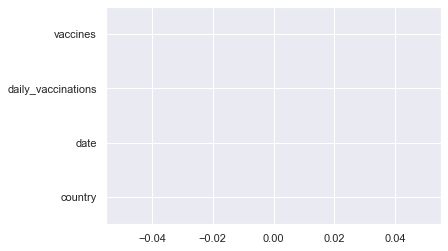

In [11]:
#As you can see there are no missing values.
df.isnull().sum().plot(kind='barh');
df.isnull().sum()

In [12]:
df.sample(13)

,country,date,daily_vaccinations,vaccines
260,Costa Rica,12/30/2020,240.0,Pfizer/BioNTech
805,Lithuania,1/19/2021,4960.0,"Moderna, Pfizer/BioNTech"
378,Denmark,1/20/2021,7840.0,"Moderna, Pfizer/BioNTech"
353,Czechia,1/25/2021,9226.0,"Moderna, Pfizer/BioNTech"
1224,Seychelles,1/22/2021,1841.0,Sinopharm
1289,Spain,1/15/2021,70139.0,"Moderna, Pfizer/BioNTech"
816,Luxembourg,1/3/2021,62.0,Pfizer/BioNTech
611,Iceland,1/10/2021,63.0,"Moderna, Pfizer/BioNTech"
311,Cyprus,1/10/2021,534.0,Pfizer/BioNTech
1064,Portugal,1/10/2021,5949.0,Pfizer/BioNTech
